# PCA ( Principle Componet Analysis )
The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set.

## Steps involved in calculating PCA
1. Scale the data by subtracting the mean and dividing by std. deviation.
2. Compute the covariance matrix.
3. Compute eigenvectors and the corresponding eigenvalues.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues, these becoming the principal components.
5. Derive the new axes by re-orientation of data points according to the principal components.


# 1.  Scale the Data by Subtracting Mean and Dividing by std. deviation.

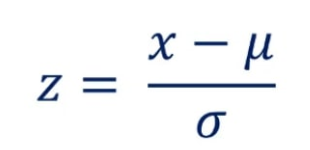

### Why is standard scaling required ?
PCA calculates a new projection of your dataset. And the new axes are based on the standard deviation of your variables. So a variable with a high standard deviation will have a higher weight for the calculation of the axes than a variable with a low standard deviation. If you normalize your data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axes.

## Standard Deviation :
    Standard deviation is the measure of dispersion of a set of data from its mean.
 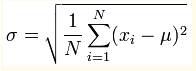
This will tell us how the data is spread from its mean value


In [14]:
import numpy as np

In [15]:

#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 


# mean Centering the data  
X_meaned = ( X - np.mean(X , axis = 0) ) / np.std(X,axis=0)

# 2. Compute the Covariance Matrix

## Covariance 
 Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

Covariance matrix can be found using below formulea
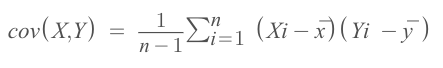

In [13]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)

# 3. Compute Eigenvectors and Corresponding Eigenvalues.

##  Eigenvectors : 
An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it.
Consider the image below in which three vectors are shown. The green square is only drawn to illustrate the linear transformation that is applied to each of these three vectors.
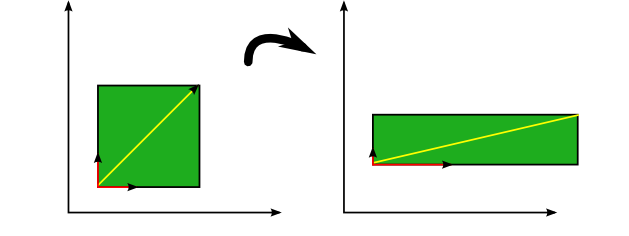

The transformation in this case is a simple scaling with factor 2 in the horizontal direction and factor 0.5 in the vertical direction, such that the transformation matrix A is defined as:
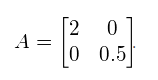

Formula :
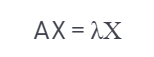


## Eigen Values :
An eigenvalue of a square matrix A is a scalar  λ  such that there exists a vector  v  for which  Av=λv. (Eogen values determine how muc change in the direction nof Eigen Vector Happen)

In [17]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

# 4. Sort the Eigenvectors by Decreasing Eigenvalues and choose k Eigenvectors with the Largest Eigenvalues

In [19]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# 5. Derive the new axes by re-orientation of data points according to the principal components.

In last step we transform our samples on to new subspace by re-orienting data fron origin axes to the ones that are now represented by PCA

In [22]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

### Advantages of PCA
1. <b>Eradication of correlated features:</b> After implementing PCA on a dataset, all the principal components are independent of one another. There is no correlation among them, thus the model is not biased towards any set of features.
2. <b>Improves algorithm performance: </b> If the input dimensions are too high, then PCA can be used to speed up the algorithm, since it eradicates correlated variables and reduces the dimensions of the data space.
3. <b>Reduces overfitting:</b> Overfitting mainly occurs when there are too many variables in the dataset. So PCA helps in overcoming the overfitting issue by reducing the number of features.
4. <b> Improves visualization: </b> It’s very hard to visualize and understand data in high dimensions. PCA transforms high-dimensional data to low-dimensional data so as to make the visualization easier.

### Disadvantages of PCA

1. <b> Less interpretable:</b> Principal components are the linear combination of your original features. Principal components are not as readable and interpretable as original features.
2. <b> Data standardization is necessary: </b> You must standardize your data before implementing PCA; otherwise PCA will not be able to find the optimal principal components.
3. <b> Loss of Information:</b> Although principal components try to cover the maximum variance among the features in a dataset, if we don’t select the number of principal components with care, it may miss some information as compared to the original list of features.

## PCA Method

In [23]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

## Sample Example

In [32]:
X = np.random.randint(10,50,100).reshape(20,5) 
print(X)

[[27 12 16 29 27]
 [24 36 12 46 14]
 [14 17 30 34 46]
 [10 36 41 23 14]
 [16 45 40 24 36]
 [42 20 47 42 15]
 [48 18 26 17 11]
 [16 17 24 41 14]
 [20 34 26 34 43]
 [41 45 30 28 26]
 [19 29 15 11 38]
 [17 28 49 41 26]
 [20 37 38 17 29]
 [10 10 13 34 22]
 [35 44 42 26 17]
 [10 21 22 15 26]
 [23 32 36 32 29]
 [42 25 36 32 36]
 [32 47 27 36 47]
 [24 46 13 36 39]]


In [31]:
PCAX = PCA(X,2)
print(PCAX)

[[ 18.90938932  11.49719307]
 [-24.47214817 -10.31536999]
 [ 13.28991006 -25.79296525]
 [ -7.96046165  14.94987643]
 [ 29.03610176   5.24603737]
 [ -6.3394953   10.51404787]
 [  8.6785127  -19.36562202]
 [ -9.82268563   0.87690676]
 [-20.42417463   0.65620506]
 [ 19.66522996  -0.90169492]
 [-20.30592779   7.36539705]
 [  1.00156749 -12.36874129]
 [-12.47668188   6.99276472]
 [ 10.74922556  15.88215717]
 [-11.93525677 -13.80596811]
 [  8.76531904   5.16061741]
 [-12.35987186  -4.20974986]
 [ -7.20850341  16.61277729]
 [  4.74547556 -15.76960254]
 [ 18.46447565   6.77573378]]
